<a href="https://colab.research.google.com/github/pkumarth/ml/blob/master/svm_ch2_Sensitivity_to_feature_scales_%2Coutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
from sklearn.svm import SVC
from sklearn import datasets

In [0]:
# petal length, petal width
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] 
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# **Sensitivity to feature scales**

In [15]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
Xs,ys

(array([[ 1., 50.],
        [ 5., 20.],
        [ 3., 80.],
        [ 5., 60.]]), array([0, 0, 1, 1]))

In [16]:
svm_clf=SVC(kernel="linear",C=100)
svm_clf.fit(Xs,ys)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin,xmax,200)    
    decision_boundary = -w[0]/w[1] * x0 -b/w[1]

    margin =1/w[1]
    gutter_up=decision_boundary + margin
    gutter_down=decision_boundary - margin

    svs=svm_clf.support_vectors_

    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,"k--",linewidth=2)
    plt.plot(x0,gutter_up,"k--",linewidth=3)
    plt.plot(x0,gutter_down,"k--",linewidth=2)

Saving figure sensitivity_to_feature_scales_plot


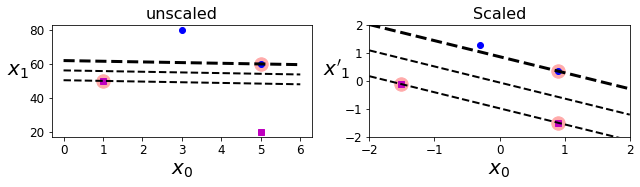

In [18]:
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],"bo")
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],"ms")

plot_svc_decision_boundary(svm_clf,0,6)

plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$   ",fontsize=20,rotation=0)
plt.title("unscaled",fontsize=16)


from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(Xs)
svm_clf.fit(X_scaled,ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")

plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

# Sensitivity to outliers

In [0]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

In [0]:
Xo1=np.concatenate([X,X_outliers[:1]],axis=0)
yo1=np.concatenate([y,y_outliers[:1]],axis=0)
Xo2 = np.concatenate([X,X_outliers[1:]],axis=0)
yo2=np.concatenate([y,y_outliers[1:]],axis=0)

In [47]:
svm_clf2=SVC(kernel="linear",C=10**9)
svm_clf2.fit(Xo2,yo2)

SVC(C=1000000000, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Saving figure sensitivity_to_outliers_plot


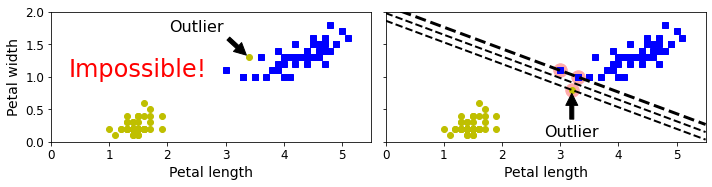

In [60]:
fig ,axes=plt.subplots(ncols=2,figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
             )
plt.axis([0, 5.5, 0, 2])


plt.sca(axes[1])

plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")

plot_svc_decision_boundary(svm_clf2, 0, 5.5)

plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()


# Large margin vs margin violations

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [0]:
iris=datasets.load_iris()


In [0]:
# petal length, petal width
X = iris["data"][:, (2, 3)]  
# Iris virginica
y = (iris["target"] == 2).astype(np.float64)

In [90]:
svm_clf=Pipeline([
                  ("scaler",StandardScaler()),
                  ("linaer_svc",LinearSVC(C=1,loss="hinge",random_state=42))
                  ])
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linaer_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [91]:
svm_clf.predict([[5.5,1.7]])

array([1.])

## Now let's generate the graph comparing different regularization settings:

In [0]:
scaler =StandardScaler()
svm_clf1=LinearSVC(C=1,loss="hinge",random_state=42)
svm_clf2=LinearSVC(C=100,loss="hinge",random_state=42)


scaled_svm_clf1=Pipeline([
                          ("scaler",scaler),
                          ("linear_svc",svm_clf1)
])

scaled_svm_clf2 =Pipeline([
                           ("scaler",scaler),
                           ("linear_svc",svm_clf2)
])


In [93]:
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [0]:
# Convert to unscaled parameters
b1=svm_clf1.decision_function([-scaler.mean_/scaler.scale_])
b2=svm_clf2.decision_function([-scaler.mean_/scaler.scale_])

w1=svm_clf1.coef_[0] / scaler.scale_
w2 =svm_clf2.coef_[0] /scaler.scale_

svm_clf1.intercept_ =np.array([b1])
svm_clf2.intercept_ =np.array([b2])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ =np.array([w2])


In [0]:
# Find support vectors (LinearSVC does not do this automatically)
t=y * 2 - 1

support_vectors_idx1 = (t * (X.dot(w1) +b1) <1).ravel()
support_vectors_idx2 = (t * (X.dot(w2)+b2)<1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


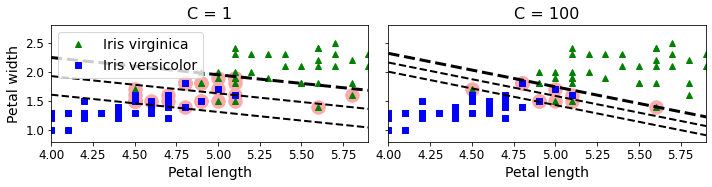

In [105]:
fig,axes=plt.subplots(ncols=2,figsize=(10,2.7),sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")

plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title(f"C = {svm_clf1.C}", fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])


plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")

plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title(f"C = {svm_clf2.C}", fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

In [0]:
|